Liquidy ratio
current ratio = current assets/ current liabilities
quick ratio = (cash+S/T investment + acct rec)/current liabilities

receivables turnover ratio = net sales revenue/avg accounts receivable
inventory turnover ratio = cost of goods sold/average inventory

Solvency ratio
Debt to asset ratio = total liabilities/total assets
debt to equity ratio = total liabilities/total equity
times interest earned ratio = (NPAT + int exp + tax exp)/int exp

current assets
cash 
ST investment
acct receivable

current liabilities

total assets
total liabilities
total equity

NPAT
interest expenses
tax expenses

EPS
PE
market cap (to select the firms)

Can we predict when ASX listed companies are about to be delisted from the market? 

In [1]:
# Importing libraries & packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
from datetime import date
# Winsorising 
from scipy.stats.mstats import winsorize

# for Transformation
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import skew
from scipy import stats

# sklearn regressions and modelling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Importing Data
df1 = pd.read_excel('Data/finresults listed.xlsx')
df2 = pd.read_excel('Data/finresults listed(1).xlsx')
df3 = pd.read_excel('Data/finresults delisted.xlsx')
df4 = pd.read_excel('Data/finresults delisted(1).xlsx')

In [3]:
# GICS sector
df5 = pd.read_excel('Data/advanced_listed.xlsx')
df6 = pd.read_excel('Data/advanced_delisted.xlsx')

In [4]:
# Making a copy
df1a = df1.copy()
df2a = df2.copy()
df3a = df3.copy()
df4a = df4.copy()
df5a = df5.copy()
df6a = df6.copy()

In [5]:
# writing a function to transform the dataset
def transforming(data, var):
    # Identifying str position
    data['new'] = data[var].str.find('-',start=1)+2
    data['new'] = data['new'].astype('int')
    
    # Creating a new column with boolean which contains str
    data["CF"] = data[var].str.contains("Annual Cash Flow")
    cf = data["CF"].sum()
    data["BS"] = data[var].str.contains("Annual Balance Sheet")
    bs = data["BS"].sum()
    data["PL"] = data[var].str.contains("Annual Profit and Loss")
    pl = data["PL"].sum()
    data["market"] = data[var].str.contains("Annual Ratio Analysis")
    market = data["market"].sum()
    
#     print(cf)
#     print(bs)
#     print(pl)
#     print(market)
    
    # Renaming the values
    if cf>0: 
        word_count_cf = int(data.loc[data["CF"]==1, 'new'].mean())
        data.loc[data['CF']==True, var] = data.Item.str.slice(word_count_cf)
#         print(word_count_cf)
    if bs>0: 
        word_count_bs = int(data.loc[data["BS"]==1, 'new'].mean())
        data.loc[data['BS']==True, var] = data.Item.str.slice(word_count_bs)
#         print(word_count_bs)
    if pl>0:
        word_count_pl = int(data.loc[data["PL"]==1, 'new'].mean())
        data.loc[data['PL']==True, var] = data.Item.str.slice(word_count_pl)
#         print(word_count_pl)
    if market>0:
        word_count_market = int(data.loc[data["market"]==1, 'new'].mean())
        data.loc[data['market']==True, var] = data.Item.str.slice(word_count_market)
#         print(word_count_market)



In [6]:
# transforming the data including BS, PL, CF, market information
transforming(df1a, 'Item')
transforming(df2a, 'Item')
transforming(df3a, 'Item')
transforming(df4a, 'Item')


In [7]:
# saving each file under different year
# df1a
for i in range(2010,2021):
    locals()['df1a_{0}'.format(i)] = df1a.pivot(index='ASX Code', columns='Item', values=str(i))
    locals()['df1a_{0}'.format(i)]['year'] = i
# df2a
for i in range(2010,2021):
    locals()['df2a_{0}'.format(i)] = df2a.pivot(index='ASX Code', columns='Item', values=str(i))
    locals()['df2a_{0}'.format(i)]['year'] = i
# df3a
for i in range(2010,2021):
    locals()['df3a_{0}'.format(i)] = df3a.pivot(index='ASX Code', columns='Item', values=str(i))
    locals()['df3a_{0}'.format(i)]['year'] = i    
# df4a
for i in range(2010,2021):
    locals()['df4a_{0}'.format(i)] = df4a.pivot(index='ASX Code', columns='Item', values=str(i))
    locals()['df4a_{0}'.format(i)]['year'] = i

In [8]:
# df1a listed 
balance_sheet_listed = df1a_2010.append([df1a_2011,
                                  df1a_2012,
                                  df1a_2013,
                                  df1a_2014,
                                  df1a_2015,
                                  df1a_2016,
                                  df1a_2017,
                                  df1a_2018,
                                  df1a_2019,
                                  df1a_2020])
# df2a listed
income_statement_listed = df2a_2010.append([df2a_2011,
                                  df2a_2012,
                                  df2a_2013,
                                  df2a_2014,
                                  df2a_2015,
                                  df2a_2016,
                                  df2a_2017,
                                  df2a_2018,
                                  df2a_2019,
                                  df2a_2020])
# df3a delisted 
balance_sheet_delisted = df3a_2010.append([df3a_2011,
                                  df3a_2012,
                                  df3a_2013,
                                  df3a_2014,
                                  df3a_2015,
                                  df3a_2016,
                                  df3a_2017,
                                  df3a_2018,
                                  df3a_2019,
                                  df3a_2020])
# df4a delisted
income_statement_delisted = df4a_2010.append([df4a_2011,
                                  df4a_2012,
                                  df4a_2013,
                                  df4a_2014,
                                  df4a_2015,
                                  df4a_2016,
                                  df4a_2017,
                                  df4a_2018,
                                  df4a_2019,
                                  df4a_2020])


# Merging data

In [31]:
# combined data for GICs code
df7a = df5a.append(df6a)

In [32]:
# listed firms
financial_listed = balance_sheet_listed.merge(income_statement_listed, how='left', on=['ASX Code','year'])
financial_listed = financial_listed.merge(df7a, how='left', on=['ASX Code'])


In [33]:
# delisted firms
financial_delisted = balance_sheet_delisted.merge(income_statement_delisted, how='left', on=['ASX Code','year'])
financial_delisted = financial_delisted.merge(df7a, how='left', on=['ASX Code'])


In [34]:
financial_delisted['delisted'] = 1

In [35]:
# Combining both datasets
both_financial = financial_listed.append(financial_delisted)


In [36]:
# replacing the missing values to zero for feature (delisted)
both_financial.loc[both_financial['delisted'].isna()==True, 'delisted'] = 0

In [37]:
both_financial['delisted'].value_counts()

0.0    23694
1.0    11396
Name: delisted, dtype: int64

In [38]:
# converting to numeric
convert_numeric = ['CA Cash', 'CA Investments', 'CA Receivables', 'Total Assets', 
                  'Total Curr. Liabilities', 'Total Current Assets', 'Total Equity', 
                  'Total Liabilities', 'EPS After Abnormals (cents/', 'Interest Expense',
                  'Market Cap.($)', 'Reported NPAT After Abnorma', 'Tax Expense', 
                  'Weighted Average Number of']
for i in both_financial[convert_numeric]:
    both_financial[i] = pd.to_numeric(both_financial[i], 
                                        errors='coerce',
                                       downcast='float')
# both_financial.info()

In [39]:
# sorting the data by code and year
both_financial = both_financial.sort_values(by=['ASX Code','year'])

In [40]:
both_financial.isna().sum()

ASX Code                           0
CA Cash                        11664
CA Investments                 11664
CA Receivables                 11664
Total Assets                   11551
Total Curr. Liabilities        11804
Total Current Assets           11654
Total Equity                   11684
Total Liabilities              11635
year                               0
EPS After Abnormals (cents/    11512
Interest Expense               15936
Market Cap.($)                 11505
Reported NPAT After Abnorma    11495
Tax Expense                    11495
Weighted Average Number of     11511
Company Name                    1144
Status                          1144
GICS Sector                     1144
GICS Industry Group             1144
GICS Industry                   1144
delisted                           0
dtype: int64

In [41]:
both_financiala = both_financial.copy()

In [42]:
# dropping the missing GICS Sector
# missing GICS Sector are index
missing_val = both_financiala['GICS Sector'].isna()
both_financiala = both_financiala.loc[missing_val==False]

In [43]:
# dropping the missing Market Cap.($)
# missing Market Cap.($) indicates the firm is not listed
missing_val = both_financiala['Market Cap.($)'].isna()
both_financiala = both_financiala.loc[missing_val==False]

In [44]:
# dropping the missing Total Curr. Liabilities
missing_val = both_financiala['Total Curr. Liabilities'].isna()
both_financiala = both_financiala.loc[missing_val==False]

In [45]:
# dropping the missing Total Equity
missing_val = both_financiala['Total Equity'].isna()
both_financiala = both_financiala.loc[missing_val==False]

In [46]:
# dropping the missing Total Assets
missing_val = both_financiala['Total Assets'].isna()
both_financiala = both_financiala.loc[missing_val==False]

In [47]:
# dropping the missing EPS After Abnormals (cents/
missing_val = both_financiala['EPS After Abnormals (cents/'].isna()
both_financiala = both_financiala.loc[missing_val==False]

In [48]:
# dropping the missing CA Cash
missing_val = both_financiala['CA Cash'].isna()
both_financiala = both_financiala.loc[missing_val==False]

In [49]:
# dropping 0 Market Cap
both_financiala = both_financiala.loc[both_financiala['Market Cap.($)']>0]

In [50]:
# dropping if missing GICS Sector
missing_val = both_financiala['GICS Sector'].isna()
both_financiala = both_financiala.loc[both_financiala['GICS Sector'] != '--']

## keeping delisted firms in the last 2 years only

In [51]:
# reindexing
both_financiala = both_financiala.reset_index()
del both_financiala['index']

In [52]:
# identifying the last year
last_row_index = both_financiala.groupby('ASX Code').apply(lambda g: g.index[-1])
second_last_row_ind = both_financiala.groupby('ASX Code').apply(lambda g: g.index[-1]-1)
first_row_index = both_financiala.groupby('ASX Code').apply(lambda g: g.index[0])

In [53]:
# identifying the last row the final financial year
both_financiala['last_row'] = "No"
both_financiala.loc[last_row_index, 'last_row'] = "Yes"
# Second last year
both_financiala.loc[second_last_row_ind, 'last_row'] = "Yes"

# prob just trying the final 2 years of data only

# identifying the first row of the financial year
both_financiala['first_row'] = "No"
both_financiala.loc[first_row_index, 'first_row'] = "Yes"

In [54]:
both_financiala = both_financiala.loc[(both_financiala['delisted']==0) | 
                    (both_financiala['delisted']==1) &
                    (both_financiala['last_row']=='Yes') ]

In [55]:
both_financiala.loc[both_financiala['last_row']=='Yes', 'delisted'].value_counts()

0.0    3712
1.0    1640
Name: delisted, dtype: int64

In [56]:
both_financiala['delisted'].value_counts()

0.0    16343
1.0     1640
Name: delisted, dtype: int64

In [57]:
both_financiala['first_row'].value_counts()

No     15873
Yes     2110
Name: first_row, dtype: int64

# Calculating Liquidity and Solvency ratios

Liquidy ratio
current ratio = current assets/ current liabilities
quick ratio = (cash+S/T investment + acct rec)/current liabilities

receivables turnover ratio = net sales revenue/avg accounts receivable
inventory turnover ratio = cost of goods sold/average inventory

Solvency ratio
Debt to asset ratio = total liabilities/total assets
debt to equity ratio = total liabilities/total equity
times interest earned ratio = (NPAT + int exp + tax exp)/int exp

In [58]:
# current ratio 
both_financiala['ca_t'] = both_financiala['Total Current Assets'] / both_financiala['Total Curr. Liabilities']
# both_financiala['ca_t1'] = both_financiala.groupby('ASX Code')['ca_t'].shift(1) 

CA Cash
CA Investments
CA Receivables
Total Assets
Total Curr. Liabilities
Total Current Assets
Total Equity
Total Liabilities
year
EPS After Abnormals (cents/
Interest Expense
Market Cap.($)
Reported NPAT After Abnorma
Tax Expense
Weighted Average Number of


In [59]:
both_financiala['cash_inv_acc_rec'] = both_financiala['CA Cash'] + both_financiala['CA Investments'] + both_financiala['CA Receivables']
both_financiala.loc[both_financiala['cash_inv_acc_rec']<1, 'cash_inv_acc_rec'] = 1

In [60]:
# Total Curr. Liabilities
both_financiala.loc[both_financiala['Total Curr. Liabilities']<1, 'Total Curr. Liabilities'] = 1

In [61]:
# Total Current Assets
both_financiala.loc[both_financiala['Total Current Assets']<1, 'Total Current Assets'] = 1

In [62]:
# Total Equity
both_financiala['Total Equity'] = both_financiala['Total Equity'].abs()
both_financiala.loc[both_financiala['Total Equity']<1, 'Total Equity'] = 1

In [63]:
# Total Liabilities
both_financiala['Total Liabilities'] = both_financiala['Total Liabilities'].abs()
both_financiala.loc[both_financiala['Total Liabilities']<1, 'Total Liabilities'] = 1

In [64]:
# Interest Expense
both_financiala.loc[both_financiala['Interest Expense']>=0, 'Interest Expense'] = 1
missing_val = both_financiala['Interest Expense'].isna()
both_financiala.loc[missing_val, 'Interest Expense'] = 1

In [65]:
# Tax Expense
both_financiala.loc[both_financiala['Tax Expense']>=0, 'Tax Expense'] = 1

In [66]:
# Ratios

In [67]:
# Liquidity Ratio
both_financiala['Current Ratio'] = both_financiala['Total Current Assets'] / both_financiala['Total Curr. Liabilities']
both_financiala['Quick Ratio'] = both_financiala['cash_inv_acc_rec'] / both_financiala['Total Curr. Liabilities']

# Solvency Ratio
both_financiala['Debt to Asset'] = both_financiala['Total Liabilities'] / both_financiala['Total Assets']
both_financiala['Debt to Equity'] = both_financiala['Total Liabilities'] / both_financiala['Total Equity']
both_financiala['Time Interest earned'] = (both_financiala['Reported NPAT After Abnorma'] + both_financiala['Interest Expense'] - both_financiala['Tax Expense']) / both_financiala['Interest Expense']
# dummy interest coverage
both_financiala['Interest Coverage'] = 0
both_financiala.loc[both_financiala['Time Interest earned']>2, 'Interest Coverage'] = 1


# Profitability Ratio
both_financiala['ROE'] = both_financiala['Reported NPAT After Abnorma'] / both_financiala['Total Equity']
both_financiala['ROA'] = both_financiala['Reported NPAT After Abnorma'] / both_financiala['Total Assets']
both_financiala['BV'] = (both_financiala['Total Equity']/both_financiala['Weighted Average Number of'])
both_financiala['d_loss'] = 0 
both_financiala.loc[both_financiala['Reported NPAT After Abnorma'] < 0, 'd_loss'] = 1


In [68]:
# replacing the negative values to zero for Time Interest earned
both_financiala.loc[both_financiala['Time Interest earned']<0, 'Time Interest earned'] = 0

In [69]:
# both_financiala.to_excel('check.xls')

In [70]:
ratios = ['Current Ratio', 'Quick Ratio', 'Debt to Asset', 'Debt to Equity', 'Interest Coverage',
         'ROE', 'ROA', 'd_loss']

# Winsorising

In [71]:
# Winsorising 
from scipy.stats.mstats import winsorize

In [72]:
for name in both_financiala[ratios]:
#     both_financiala[name+"_w1"] = winsorize(both_financiala[name], 
#                                            limits = [0.01,0.01])
    both_financiala[name] = winsorize(both_financiala[name], 
                                           limits = [0.05,0.05])

In [73]:
# Winsorize top and bottom 1%
ratios_w1 = ['Current Ratio_w1', 'Quick Ratio_w1', 'Debt to Asset_w1', 'Debt to Equity_w1', 'Interest Coverage_w1',
         'ROE_w1', 'ROA_w1', 'd_loss_w1']

# Winsorize top and bottom 5%
ratios_w5 = ['Current Ratio_w5', 'Quick Ratio_w5', 'Debt to Asset_w5', 'Debt to Equity_w5', 'Interest Coverage_w5',
         'ROE_w5', 'ROA_w5', 'd_loss_w5']


In [166]:
descriptives = ['Current Ratio', 'Quick Ratio', 'Debt to Asset', 'Debt to Equity', 'Interest Coverage',
         'ROE', 'ROA', 'd_loss', 'delisted']

In [167]:
table = both_financiala[descriptives].describe().T
table.to_excel('Summary_table.xls')
table

<ipython-input-167-09d234d9136d>:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  table.to_excel('Summary_table.xls')


,count,mean,std,min,25%,50%,75%,max
Current Ratio,16206.0,5.851481,8.300222,0.168712,1.088189,2.273781,6.478550,32.219662
Quick Ratio,16206.0,5.386021,8.118876,0.103550,0.741259,1.764515,5.886527,31.175396
Debt to Asset,16206.0,0.344615,0.326348,0.015763,0.073603,0.257717,0.503841,1.236133
Debt to Equity,16206.0,0.797602,1.110930,0.016015,0.079451,0.347194,1.004773,4.350751
Interest Coverage,16206.0,0.439652,0.496360,0.000000,0.000000,0.000000,1.000000,1.000000
ROE,16206.0,-0.482723,0.968522,-3.620931,-0.544861,-0.107629,0.066920,0.282553
ROA,16206.0,-0.331857,0.621461,-2.284066,-0.399784,-0.086086,0.038744,0.166435
d_loss,16206.0,0.644576,0.478656,0.000000,0.000000,1.000000,1.000000,1.000000
delisted,16206.0,0.097618,0.296807,0.000000,0.000000,0.000000,0.000000,1.000000


In [170]:
both_financiala['year'].sort_values().unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

## generating listed and delisted datasets for T-test and visualisation

In [138]:
delisted_firms = both_financiala.loc[both_financiala['delisted']==1]
listed_firms = both_financiala.loc[both_financiala['delisted']==0]

In [176]:
ratios

['Current Ratio',
 'Quick Ratio',
 'Debt to Asset',
 'Debt to Equity',
 'Interest Coverage',
 'ROE',
 'ROA',
 'd_loss']

In [172]:
def print_sig(p_value, alpha):
    if p_value < alpha: 
        print("We reject our null hypothesis.")
        
    elif p_value > alpha: 
        print("We fail to reject our null hypothesis.")
        
    else: 
        print("Our test is inconclusive")


In [183]:
p_val = []
t_stat = []

for i in ratios: 
    alpha = 0.05
    t2, p2 = stats.ttest_ind(delisted_firms[i],listed_firms[i])
    t_stat.append(t2)
    p_val.append(p2)

t_test = {"Variables":ratios, "T-stat":t_stat, "p-value":p_val}

df_t_test = pd.DataFrame (t_test, columns = ['Variables','T-stat','p-value'])
df_t_test

,Variables,T-stat,p-value
0,Current Ratio,-8.096828,6.038830e-16
1,Quick Ratio,-8.003694,1.288634e-15
2,Debt to Asset,20.904567,8.911783e-96
3,Debt to Equity,15.910674,1.432708e-56
4,Interest Coverage,4.827372,1.396085e-06
5,ROE,-3.697335,2.185932e-04
6,ROA,-2.887394,3.889615e-03
7,d_loss,-1.200966,2.297819e-01


In [184]:
df_t_test.to_csv('T-test.csv')

# EDA

In [75]:
# dropping 2020 
both_financiala = both_financiala.loc[both_financiala['year']<2020]

In [76]:
both_financiala['delisted'] = both_financiala['delisted'].astype(int)

In [77]:
y = both_financiala['delisted']
X = both_financiala[ratios]

X.head()

,Current Ratio,Quick Ratio,Debt to Asset,Debt to Equity,Interest Coverage,ROE,ROA,d_loss
0,20.259771,19.906103,0.039951,0.041614,1,-0.252324,-0.242243,1
2,23.474625,23.474625,0.042585,0.044480,0,-0.365704,-0.350130,1
3,12.110680,11.975158,0.082523,0.089946,0,-0.946537,-0.868425,1
4,5.041099,5.021365,0.195371,0.242809,0,-0.790029,-0.635680,1
6,0.595655,0.470723,0.445382,0.803044,0,0.063993,0.035492,0


In [78]:
both_financiala.groupby('year')['delisted'].value_counts()

year  delisted
2010  0           1172
      1            175
2011  0           1249
      1            156
2012  0           1300
      1            159
2013  0           1343
      1            159
2014  0           1392
      1            146
2015  0           1453
      1            157
2016  0           1533
      1            151
2017  0           1641
      1            171
2018  0           1733
      1            182
2019  0           1808
      1            126
Name: delisted, dtype: int64

<AxesSubplot:>

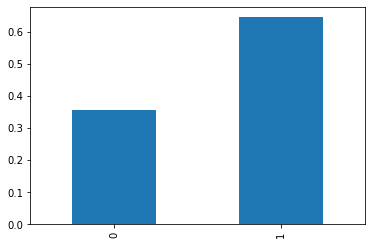

In [79]:
both_financiala['d_loss'].value_counts(normalize=True).plot(kind='bar')

In [186]:
both_financiala['delisted'].value_counts(normalize=True)

0    0.902382
1    0.097618
Name: delisted, dtype: float64

<AxesSubplot:>

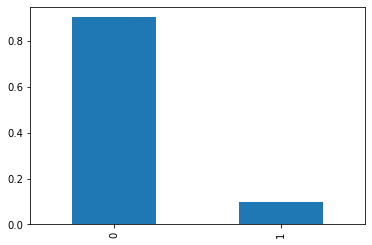

In [185]:
both_financiala['delisted'].value_counts(normalize=True).plot(kind='bar')

In [81]:
both_financiala['delisted'].value_counts()

0    14624
1     1582
Name: delisted, dtype: int64

<AxesSubplot:>

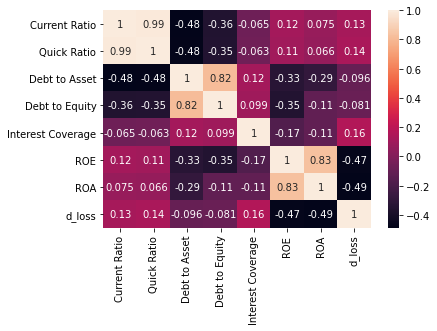

In [82]:
sns.heatmap(X.corr(), annot=True, fmt='.2g')

Text(0.5, 1.0, 'Quick Ratio')

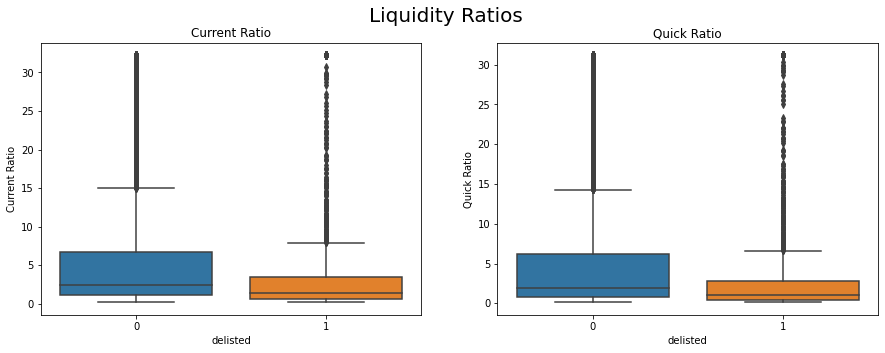

In [83]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Liquidity Ratios', size=20)
sns.boxplot(ax=axes[0], x='delisted', y='Current Ratio', data=both_financiala)
axes[0].set_title('Current Ratio')
sns.boxplot(ax=axes[1], x='delisted', y='Quick Ratio', data=both_financiala)
axes[1].set_title('Quick Ratio')

Text(0.5, 1.0, 'Debt to Equity')

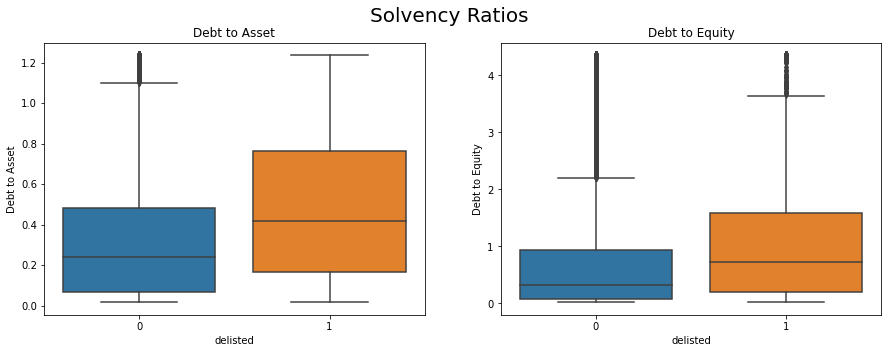

In [84]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Solvency Ratios', size=20)
sns.boxplot(ax=axes[0], x='delisted', y='Debt to Asset', data=both_financiala)
axes[0].set_title('Debt to Asset')
sns.boxplot(ax=axes[1], x='delisted', y='Debt to Equity', data=both_financiala)
axes[1].set_title('Debt to Equity')

Text(0.5, 1.0, 'ROE')

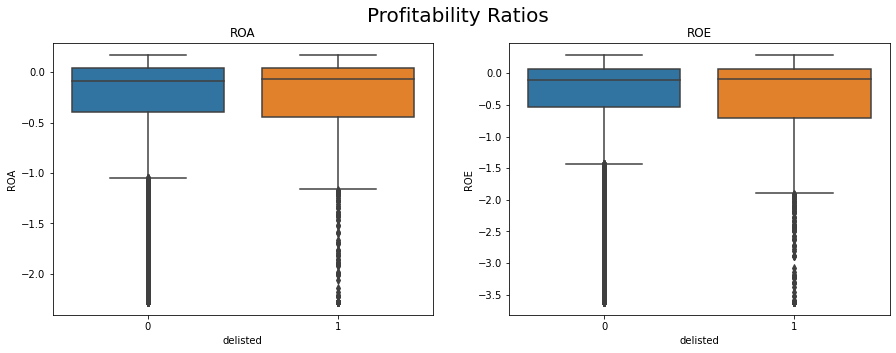

In [85]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Profitability Ratios', size=20)
sns.boxplot(ax=axes[0], x='delisted', y='ROA', data=both_financiala)
axes[0].set_title('ROA')
sns.boxplot(ax=axes[1], x='delisted', y='ROE', data=both_financiala)
axes[1].set_title('ROE')

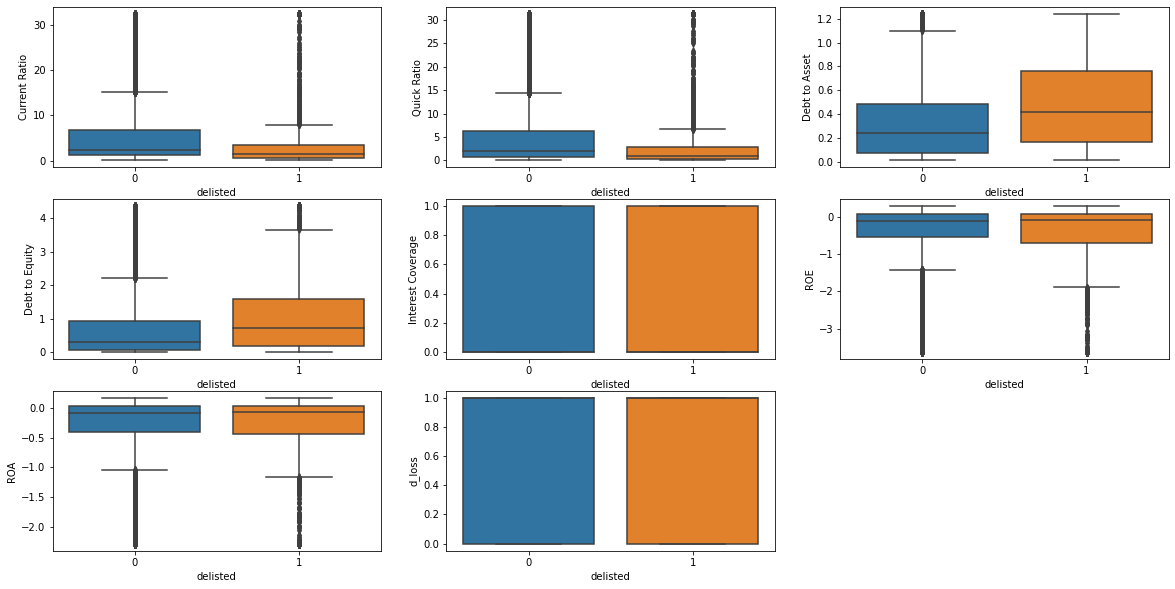

In [86]:
plt.figure(figsize=(20,10))
for i, c in enumerate(both_financiala[ratios]):
    plt.subplot(3,3, i+1)
    sns.boxplot(x='delisted', y=c, data=both_financiala)
plt.show()

Text(0.5, 1.0, 'Total number of delisted companies over the years')

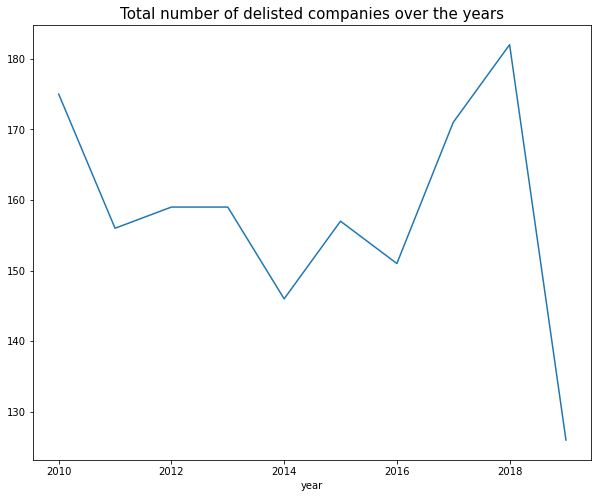

In [87]:
plt.figure(figsize=(10,8))
both_financiala.groupby('year')['delisted'].sum().plot()
plt.title("Total number of delisted companies over the years", size=15)

In [122]:
ratios

['Current Ratio',
 'Quick Ratio',
 'Debt to Asset',
 'Debt to Equity',
 'Interest Coverage',
 'ROE',
 'ROA',
 'd_loss']

Text(0.5, 1.0, 'Quick Ratio')

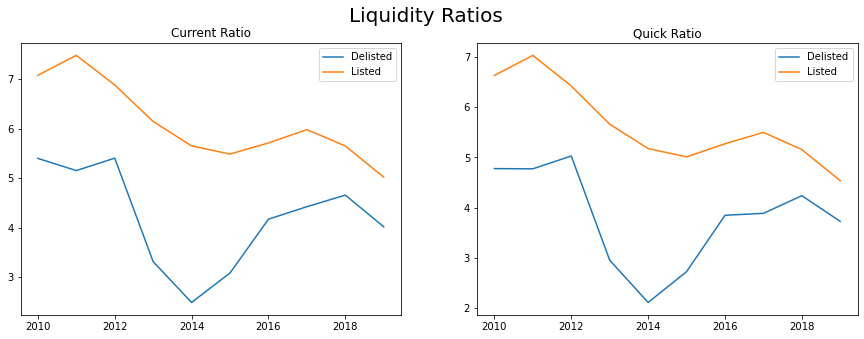

In [158]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Liquidity Ratios', size=20)
axes[0].plot(delisted_firms.groupby('year')['Current Ratio'].mean(), label='Delisted')
axes[0].plot(listed_firms.groupby('year')['Current Ratio'].mean(), label='Listed')
axes[0].legend()
axes[0].set_title('Current Ratio')

axes[1].plot(delisted_firms.groupby('year')['Quick Ratio'].mean(), label='Delisted')
axes[1].plot(listed_firms.groupby('year')['Quick Ratio'].mean(), label='Listed')
axes[1].legend()
axes[1].set_title('Quick Ratio')

Text(0.5, 1.0, 'Debt to Equity')

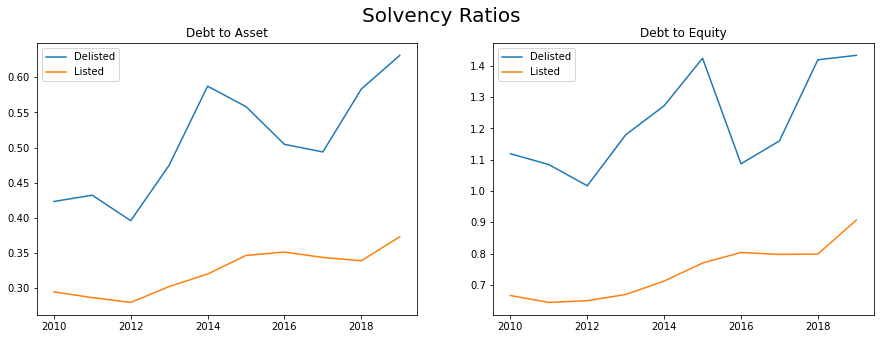

In [163]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Solvency Ratios', size=20)
axes[0].plot(delisted_firms.groupby('year')['Debt to Asset'].mean(), label='Delisted')
axes[0].plot(listed_firms.groupby('year')['Debt to Asset'].mean(), label='Listed')
axes[0].legend()
axes[0].set_title('Debt to Asset')

axes[1].plot(delisted_firms.groupby('year')['Debt to Equity'].mean(), label='Delisted')
axes[1].plot(listed_firms.groupby('year')['Debt to Equity'].mean(), label='Listed')
axes[1].legend()
axes[1].set_title('Debt to Equity')

Text(0.5, 1.0, 'ROE')

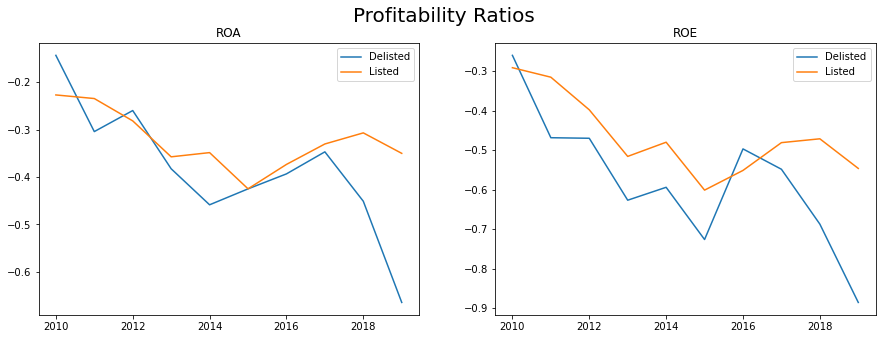

In [164]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Profitability Ratios', size=20)
axes[0].plot(delisted_firms.groupby('year')['ROA'].mean(), label='Delisted')
axes[0].plot(listed_firms.groupby('year')['ROA'].mean(), label='Listed')
axes[0].legend()
axes[0].set_title('ROA')

axes[1].plot(delisted_firms.groupby('year')['ROE'].mean(), label='Delisted')
axes[1].plot(listed_firms.groupby('year')['ROE'].mean(), label='Listed')
axes[1].legend()
axes[1].set_title('ROE')

In [66]:
def facetgridplot(train, var):
    facet = sns.FacetGrid(train, hue="delisted", aspect=4)
    facet.map(sns.kdeplot, var, shade= True)
    facet.set(xlim=(0, train[var].max()))
    facet.add_legend()
    plt.show();

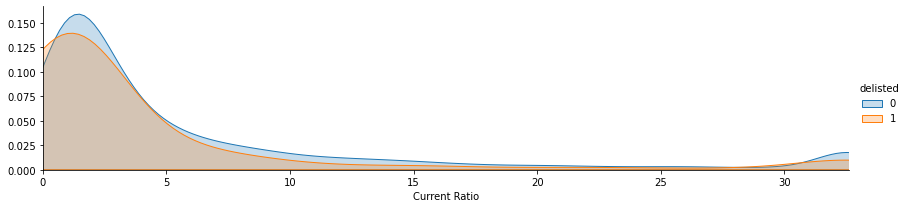

In [67]:
facetgridplot(both_financiala, 'Current Ratio')

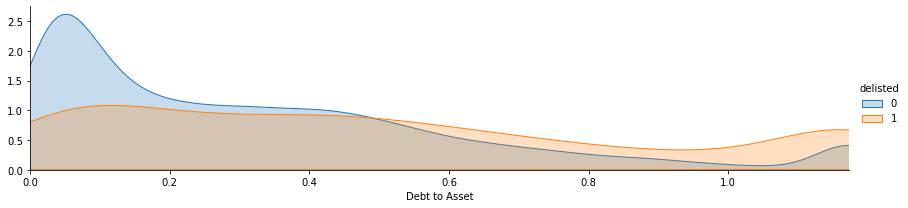

In [68]:
facetgridplot(both_financiala, 'Debt to Asset')

# Training and test data

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


# Feature scaling

In [89]:
# feature scaling/ Data standardisation
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled = scaler.fit_transform(X_train_scaled)
# make sure to use transform not fit_transform for X_test
X_test_scaled = scaler.transform(X_test_scaled)

# Smote for under sampling

In [90]:
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
# from matplotlib import pyplot
from numpy import where

In [91]:
counter = Counter(y)
print(counter)

Counter({0: 14624, 1: 1582})


In [92]:
# transform the dataset
oversample = SMOTE()

# using the normal data
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = oversample.fit_resample(X_test, y_test)

# using the scaled data
X_train_scaled_smote, y_train_scaled_smote = oversample.fit_resample(X_train_scaled, y_train)
X_test_scaled_smote, y_test_scaled_smote = oversample.fit_resample(X_test_scaled, y_test)

# summarize the new class distribution
counter = Counter(y_train_scaled_smote)
print(counter)
counter = Counter(y_test_scaled_smote)
print(counter)

Counter({0: 11697, 1: 11697})
Counter({0: 2927, 1: 2927})


# Regularisation

## Ridge Regression model

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

In [94]:
model = LinearRegression()
model.fit(X_train_scaled_smote, y_train_scaled_smote)

LinearRegression()

In [95]:
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
clf = Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in ridge_alphas:
    clf.set_params(alpha = a)
    clf.fit(X_train_scaled_smote, y_train_scaled_smote)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, model.coef_))

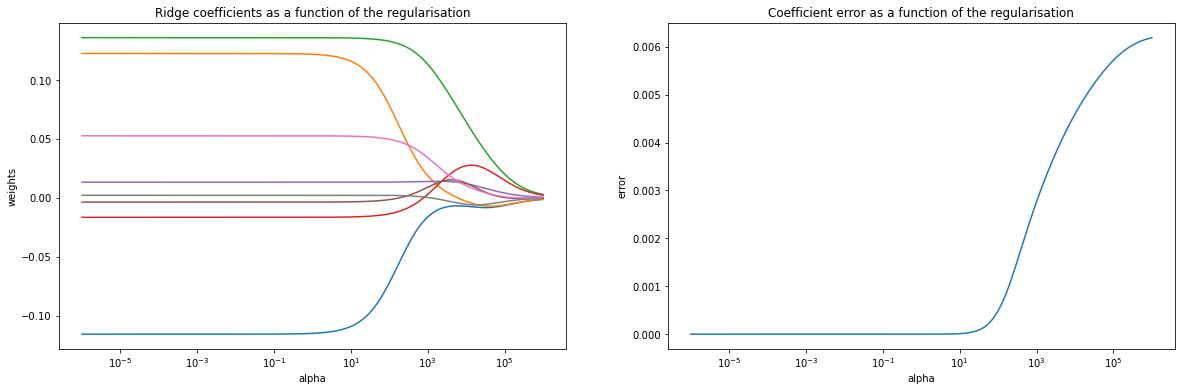

In [96]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

In [97]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train_scaled_smote, y_train_scaled_smote)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X_train_scaled_smote, y_train_scaled_smote))

Alpha: 26.126752255633264
Score: 0.06480327144414122


In [98]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

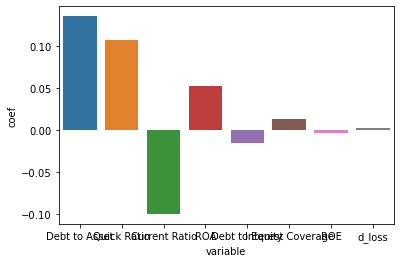

In [99]:
view_coeff(X, optimal_ridge)

In [100]:
## Calculate Lasso Regression model

# create a model object to hold the modelling parameters
clf = Lasso()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
lasso_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in lasso_alphas:
    clf.set_params(alpha = a)
    clf.fit(X_train_scaled_smote, y_train_scaled_smote)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, model.coef_))

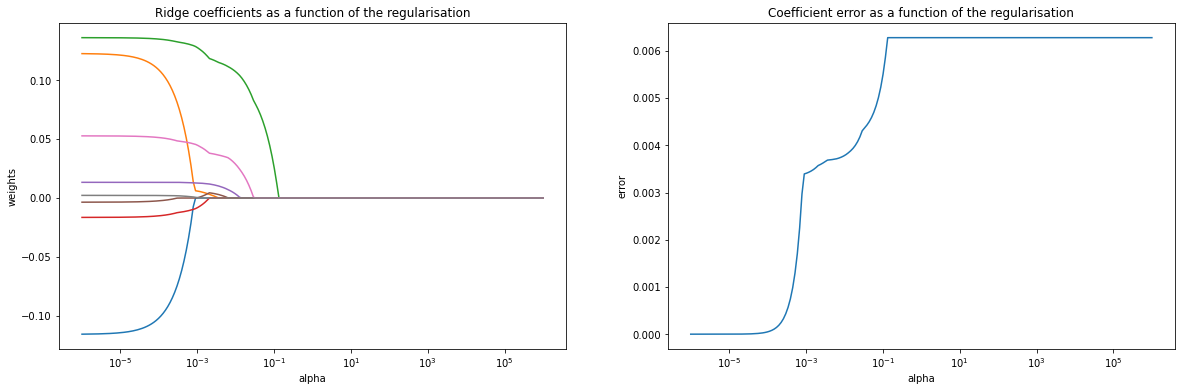

In [101]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

In [102]:
optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10)
optimal_lasso.fit(X_train_scaled_smote, y_train_scaled_smote)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X_train_scaled_smote, y_train_scaled_smote))

Alpha: 1e-06
Score: 0.06481867978794387


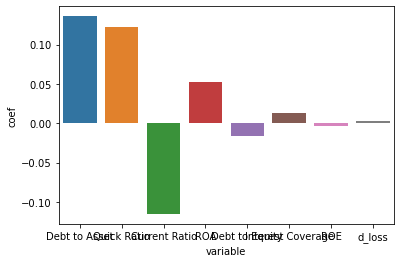

In [103]:
view_coeff(X, optimal_lasso)

# define

In [104]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from scipy.stats import sem
from numpy import mean
from numpy import std

In [105]:
def output_results(X_train, X_test, y_train, y_test, model):
#     model = model
#     model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
#     # coefficients
#     for col in zip(X.columns, model.coef_[0]):
#         print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names
    
#     # intercepts
#     print("intercept = " + str(model.intercept_))

    # Score
    print("score = " + str(model.score(X_train, y_train)))
    
    # Accuracy score
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#     print((TP + TN) / float(TP + TN + FP + FN))
    
    # Recall
    print("Recall:",metrics.recall_score(y_test, y_pred))
#     print(metrics.recall_score(y_test, y_pred))
#     print(TP / float(TP + FN))

    # Precision
    print("Precision:",metrics.precision_score(y_test, y_pred))
#     print(metrics.precision_score(y_test, y_pred))
#     print(TP / float(TP + FP))

    # confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_pred)
    print(confusion)
    print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
#     #[row, column]
#     TP = confusion[1, 1]
#     TN = confusion[0, 0]
#     FP = confusion[0, 1]
#     FN = confusion[1, 0]
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm,annot=True,fmt="d");
    print(classification_report(y_test, y_pred))
    


In [106]:
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    model = LogisticRegression()
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores    

In [107]:
def cross_validation_model(model, X_train, y_train):
    
#     model = model
#     model.fit(X_train, y_train)
    
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("cv=5: ", scores.mean())
    
    # KFold
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('KFold - Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    # report ROC AUC
    results = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))
    
    # Reapeated KFold
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('Repeated KFold - Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    
    # configurations to test
#     repeats = range(1,10)
#     results = list()
#     for r in repeats:
#         # evaluate using a given number of repeats
#         scores = evaluate_model(X_train, y_train, r)
#         # summarize
#         print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
#         # store
#         results.append(scores)
#     # plot the results
#     pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
#     pyplot.show()


# Logistic Regression Model

In [108]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled_smote, y_train_scaled_smote)
y_pred_log_model = log_model.predict(X_test_scaled_smote)

In [191]:
# coefficients
for col in zip(X.columns, log_model.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

# intercepts
print("intercept = " + str(log_model.intercept_))

Current Ratio  -0.585312
Quick Ratio  +0.621866
Debt to Asset  +0.605014
Debt to Equity  -0.094604
Interest Coverage  +0.056762
ROE         -0.027154
ROA         +0.245383
d_loss      +0.015356
intercept = [-0.10541348]


score = 0.6056253740275285
Accuracy: 0.5912196788520669
Recall: 0.5404851383669286
Precision: 0.6015209125475285
[[1879 1048]
 [1345 1582]]
[['TN' 'FP']
 ['FN' 'TP']]
              precision    recall  f1-score   support

           0       0.58      0.64      0.61      2927
           1       0.60      0.54      0.57      2927

    accuracy                           0.59      5854
   macro avg       0.59      0.59      0.59      5854
weighted avg       0.59      0.59      0.59      5854



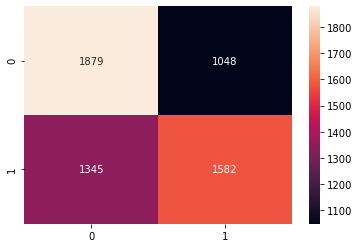

In [109]:
output_results(X_train_scaled_smote, X_test_scaled_smote, y_train_scaled_smote, y_test_scaled_smote, 
               log_model)

In [110]:
cross_validation_model(log_model, X_train_scaled_smote, y_train_scaled_smote)

cv=5:  0.605197876387461
KFold - Accuracy: 0.605 (0.007)
AUC: 0.643 (0.009)
Repeated KFold - Accuracy: 0.605 (0.010)


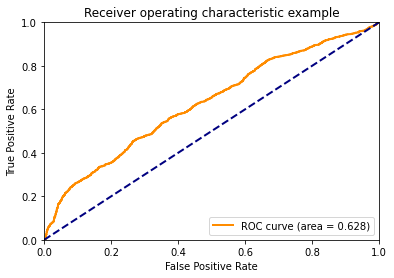

In [189]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = log_model.predict_proba(X_test_scaled_smote)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test_scaled_smote, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# Support Vector Machines

In [112]:
from sklearn import svm
from sklearn.datasets import make_blobs

In [113]:
# fit the model, without regularisation (make C large):
svc_model = svm.SVC(kernel = 'linear', probability=True)
svc_model.fit(X_train_scaled_smote, y_train_scaled_smote)
y_pred_svc_model = svc_model.predict(X_test_scaled_smote)

score = 0.5989142515174831
Accuracy: 0.5848992142125042
Recall: 0.37820293816194056
Precision: 0.644729178800233
[[2317  610]
 [1820 1107]]
[['TN' 'FP']
 ['FN' 'TP']]
              precision    recall  f1-score   support

           0       0.56      0.79      0.66      2927
           1       0.64      0.38      0.48      2927

    accuracy                           0.58      5854
   macro avg       0.60      0.58      0.57      5854
weighted avg       0.60      0.58      0.57      5854



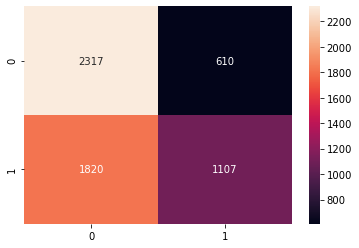

In [114]:
output_results(X_train_scaled_smote, X_test_scaled_smote, y_train_scaled_smote, y_test_scaled_smote, 
               svc_model)

In [188]:
scores = cross_val_score(svc_model, X_train_scaled_smote, y_train_scaled_smote, cv=5)
print("cv=5: ", scores.mean())

cv=5:  0.5979738547818243


In [ ]:
# fit the model, without regularisation (make C large):
svc_model = svm.SVC(kernel = 'rbf', probability=True)
svc_model.fit(X_train_scaled_smote, y_train_scaled_smote)
y_pred_svc_model = svc_model.predict(X_test_scaled_smote)

In [ ]:
output_results(X_train_scaled_smote, X_test_scaled_smote, y_train_scaled_smote, y_test_scaled_smote, 
               svc_model)

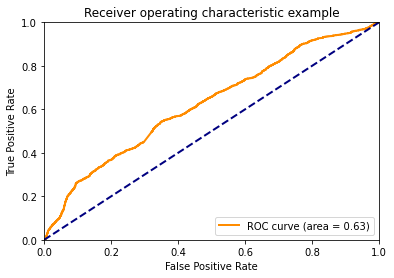

In [115]:
y_pred = svc_model.predict_proba(X_test_scaled_smote)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test_scaled_smote, y_pred)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# Naive Bayes

In [116]:
from sklearn.naive_bayes import GaussianNB

In [117]:
NB_model = GaussianNB()
NB_model.fit(X_train_scaled_smote, y_train_scaled_smote)
y_pred_NB_model = NB_model.predict(X_test_scaled_smote)

score = 0.5948106352056083
Accuracy: 0.5802869832593098
Recall: 0.4106593782029382
Precision: 0.6215098241985523
[[2195  732]
 [1725 1202]]
[['TN' 'FP']
 ['FN' 'TP']]
              precision    recall  f1-score   support

           0       0.56      0.75      0.64      2927
           1       0.62      0.41      0.49      2927

    accuracy                           0.58      5854
   macro avg       0.59      0.58      0.57      5854
weighted avg       0.59      0.58      0.57      5854



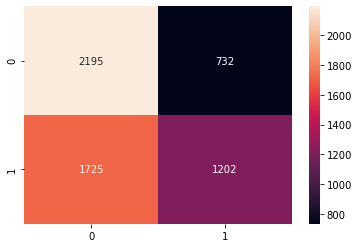

In [118]:
output_results(X_train_scaled_smote, X_test_scaled_smote, y_train_scaled_smote, y_test_scaled_smote, 
               NB_model)

In [119]:
cross_validation_model(GaussianNB(), 
                       X_train_scaled_smote, y_train_scaled_smote)

cv=5:  0.5948534385533281
KFold - Accuracy: 0.595 (0.008)
AUC: 0.621 (0.012)
Repeated KFold - Accuracy: 0.595 (0.010)


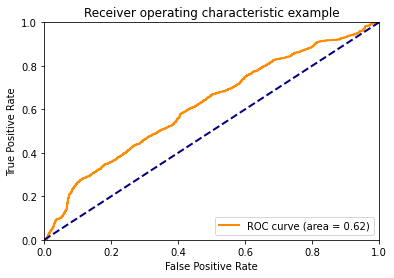

In [120]:
y_pred = NB_model.predict_proba(X_test_scaled_smote)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test_scaled_smote, y_pred)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

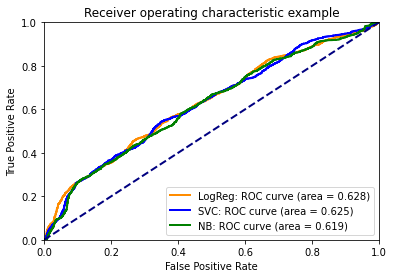

In [190]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = log_model.predict_proba(X_test_scaled_smote)[:,1]
preds_svc = svc_model.predict_proba(X_test_scaled_smote)[:,1]
preds_nb = NB_model.predict_proba(X_test_scaled_smote)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test_scaled_smote, preds)
fpr_svc, tpr_svc, _ = metrics.roc_curve(y_test_scaled_smote, preds_svc)
fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test_scaled_smote, preds_nb)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)
roc_auc_svc = metrics.auc(fpr_svc, tpr_svc)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'LogReg: ROC curve (area = %0.3f)' % roc_auc)
plt.plot(fpr_svc, tpr_svc, color='blue', lw = lw, label = 'SVC: ROC curve (area = %0.3f)' % roc_auc_svc)
plt.plot(fpr_nb, tpr_nb, color='green', lw = lw, label = 'NB: ROC curve (area = %0.3f)' % roc_auc_nb)

plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# Gridsearch

In [241]:
from sklearn.model_selection import GridSearchCV

In [242]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)
lr_gs.fit(X_train_scaled_smote, y_train_scaled_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/jinyan

/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/jinyan

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']},
             verbose=1)

In [243]:
best_svc = lr_gs.best_estimator_
print(lr_gs.best_params_)
print(lr_gs.best_score_)

{'C': 100, 'penalty': 'l2'}
0.6108408967953105


In [244]:
# gridsearch SVM
from sklearn.grid_search import GridSearchCV

svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

svc_gs = GridSearchCV(SVC(probability=True), svc_params, cv=5, verbose=1)
svc_gs.fit(X, y)

ModuleNotFoundError: No module named 'sklearn.grid_search'

In [245]:
best_svc = svc_gs.best_estimator_
print(svc_gs.best_params_)
print(svc_gs.best_score_)

NameError: name 'svc_gs' is not defined